In [1]:
pip install PyPDF2 python-docx pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.3 MB/s eta 0:00:00


In [2]:
pip install pdf2image opencv-python pillow


In [3]:
!apt-get update
!apt-get install libssl-dev
!apt-get install poppler-utils


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,619 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,506 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [4]:
!pip install python-docx
!pip install pdf2image
!pip install fpdf
!apt-get install poppler-utils
!pip install python-docx pdf2image fpdf
!pip install aspose-words



  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=8a14a8f417fce2e7c79603a575620c579cab4301f7402806ecd6748fc482c064
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 MB 8.1 MB/s eta 0:00:00


In [5]:
import os
import re
import pandas as pd
from PyPDF2 import PdfReader
from docx import Document

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import os
from pdf2image import convert_from_path
import pandas as pd

# Directorios
dataset_folder = "/content/drive/MyDrive/curriculum_viate_dataset/pdf"  # Cambia 'word' por 'pdf'
output_folder = "/content/drive/MyDrive/curriculum_viate_dataset/output_file_dataset"
csv_output_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_images.csv"

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Función para verificar y limpiar nombres de archivos
def clean_filename(filename):
    """
    Limpia el nombre del archivo eliminando caracteres problemáticos.
    """
    return "".join(c for c in filename if c.isalnum() or c in (' ', '.', '_')).rstrip()

# Función para convertir PDF a imágenes
def pdf_to_images(pdf_path, output_prefix, dpi=150):
    """
    Convierte un archivo PDF a imágenes usando pdf2image.
    """
    try:
        # Convertir PDF a imágenes
        pages = convert_from_path(pdf_path, dpi=dpi)
        images = []
        for i, page in enumerate(pages):
            output_image_path = os.path.join(output_folder, f"{output_prefix}_page_{i + 1}.jpg")
            page.save(output_image_path, "JPEG")
            images.append(output_image_path)
        return images
    except Exception as e:
        print(f"Error al convertir {pdf_path} a imágenes: {e}")
        return []

# Procesar el dataset en batches
batch_size = 50  # Tamaño del batch para minimizar el uso de memoria
all_files = [f for f in os.listdir(dataset_folder) if f.endswith(".pdf")]
total_batches = len(all_files) // batch_size + (1 if len(all_files) % batch_size != 0 else 0)

# Verificar si existe un CSV previo para reiniciar desde ahí
if os.path.exists(csv_output_path):
    df_existing = pd.read_csv(csv_output_path)
    processed_files = set(df_existing["filename"].str.split("_page_").str[0])  # Archivos ya procesados
else:
    df_existing = pd.DataFrame(columns=["filename"])
    processed_files = set()

# Procesar archivos en batches
for batch_num in range(total_batches):
    start_idx = batch_num * batch_size
    end_idx = start_idx + batch_size
    batch_files = all_files[start_idx:end_idx]

    filenames = []

    print(f"Procesando batch {batch_num + 1}/{total_batches}...")

    for file in batch_files:
        # Limpia el nombre del archivo
        file = clean_filename(file)

        if file in processed_files:
            print(f"Archivo {file} ya procesado, saltando...")
            continue

        pdf_path = os.path.join(dataset_folder, file)
        output_prefix = os.path.splitext(file)[0]  # Usar el nombre del archivo como prefijo

        try:
            # Convierte el archivo PDF a imágenes
            image_paths = pdf_to_images(pdf_path, output_prefix)
            filenames.extend(image_paths)
        except Exception as e:
            print(f"Error procesando {file}: {e}")

    # Guardar los resultados del batch en el CSV
    batch_data = {"filename": filenames}
    df_batch = pd.DataFrame(batch_data)
    df_existing = pd.concat([df_existing, df_batch], ignore_index=True)
    df_existing.to_csv(csv_output_path, index=False)

    print(f"Batch {batch_num + 1}/{total_batches} procesado y guardado.")

print("Todos los batches procesados. Dataset completo generado.")



Procesando batch 1/66...
Batch 1/66 procesado y guardado.
Procesando batch 2/66...
Batch 2/66 procesado y guardado.
Procesando batch 3/66...
Batch 3/66 procesado y guardado.
Procesando batch 4/66...
Batch 4/66 procesado y guardado.
Procesando batch 5/66...
Batch 5/66 procesado y guardado.
Procesando batch 6/66...
Batch 6/66 procesado y guardado.
Procesando batch 7/66...
Batch 7/66 procesado y guardado.
Procesando batch 8/66...
Batch 8/66 procesado y guardado.
Procesando batch 9/66...
Batch 9/66 procesado y guardado.
Procesando batch 10/66...
Batch 10/66 procesado y guardado.
Procesando batch 11/66...
Batch 11/66 procesado y guardado.
Procesando batch 12/66...
Batch 12/66 procesado y guardado.
Procesando batch 13/66...
Batch 13/66 procesado y guardado.
Procesando batch 14/66...
Batch 14/66 procesado y guardado.
Procesando batch 15/66...
Batch 15/66 procesado y guardado.
Procesando batch 16/66...
Batch 16/66 procesado y guardado.
Procesando batch 17/66...
Batch 17/66 procesado y guardado

In [6]:
import os
from pdf2image import convert_from_path
import pandas as pd

# Directorios de entrada y salida
similar_folder = "/content/drive/MyDrive/curriculum_viate_dataset/curriculum_recomendados_pdf"  # Carpeta de currículums similares
not_similar_folder = "/content/drive/MyDrive/curriculum_viate_dataset/curriculum_no_recomendados_pdf"  # Carpeta de currículums no similares
output_folder = "/content/drive/MyDrive/curriculum_viate_dataset/output_file_supervisado"  # Carpeta donde se guardarán las imágenes generadas

# Crear carpetas de salida si no existen
os.makedirs(output_folder, exist_ok=True)

# Función para convertir PDF a imágenes
def pdf_to_images(pdf_path, output_prefix, dpi=600):
    """
    Convierte un archivo PDF a imágenes usando pdf2image.
    """
    try:
        # Convertir PDF a imágenes
        pages = convert_from_path(pdf_path, dpi=dpi)
        images = []
        for i, page in enumerate(pages):
            output_image_path = os.path.join(output_folder, f"{output_prefix}_page_{i + 1}.jpg")
            page.save(output_image_path, "JPEG")
            images.append(output_image_path)
        return images
    except Exception as e:
        print(f"Error al convertir {pdf_path} a imágenes: {e}")
        return []

# Listas para almacenar nombres de imágenes y etiquetas
filenames = []
labels = []

# Procesar documentos similares
print("Procesando currículums similares...")
for file in os.listdir(similar_folder):
    if file.endswith(".pdf"):
        pdf_path = os.path.join(similar_folder, file)
        output_prefix = f"{os.path.splitext(file)[0]}_similar"
        image_paths = pdf_to_images(pdf_path, output_prefix)
        filenames.extend(image_paths)
        labels.extend([1] * len(image_paths))  # Etiqueta 1 para similares

# Procesar documentos no similares
print("Procesando currículums no similares...")
for file in os.listdir(not_similar_folder):
    if file.endswith(".pdf"):
        pdf_path = os.path.join(not_similar_folder, file)
        output_prefix = f"{os.path.splitext(file)[0]}_no_similar"
        image_paths = pdf_to_images(pdf_path, output_prefix)
        filenames.extend(image_paths)
        labels.extend([0] * len(image_paths))  # Etiqueta 0 para no similares

# Crear un DataFrame con las imágenes generadas y sus etiquetas
data = {"filename": filenames, "label": labels}
df = pd.DataFrame(data)

# Guardar el DataFrame como archivo CSV
output_csv = "/content/drive/MyDrive/curriculum_viate_dataset/labels.csv"
df.to_csv(output_csv, index=False)

print(f"Imágenes generadas y etiquetas guardadas en {output_csv}")



Procesando currículums similares...
Procesando currículums no similares...
Imágenes generadas y etiquetas guardadas en /content/drive/MyDrive/curriculum_viate_dataset/labels.csv


se guardan los datos etiquetados en labels.csv

In [7]:
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
import pandas as pd

# Configurar el extractor con pooling
base_model = ResNet50(weights="imagenet", include_top=False)
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))
# Función para cargar un batch de imágenes con mayor detalle
def load_images_in_batch(image_paths, target_size=(299, 299)):
    batch_images = []
    for img_path in image_paths:
        try:
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            batch_images.append(img_array)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
            batch_images.append(np.zeros((*target_size, 3)))  # Imagen vacía si hay error
    batch_images = np.array(batch_images)
    return preprocess_input(batch_images)

# Directorios y CSV
csv_path = "/content/drive/MyDrive/curriculum_viate_dataset/labels.csv"
output_csv_features = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_features_flattened.csv"

# Cargar el archivo CSV con las etiquetas
data = pd.read_csv(csv_path)

# Inicializar listas para características, etiquetas y nombres de archivos
features = []
labels = []
filenames = []

# Configurar batch size
batch_size = 16
total_batches = len(data) // batch_size + (1 if len(data) % batch_size != 0 else 0)

# Procesar las imágenes en batches
for batch_num in range(total_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(data))
    batch_data = data.iloc[start_idx:end_idx]

    image_paths = batch_data["filename"].tolist()
    batch_labels = batch_data["label"].tolist()

    print(f"Procesando batch {batch_num + 1}/{total_batches}...")

    # Cargar y preprocesar imágenes en batch
    batch_images = load_images_in_batch(image_paths)

    # Extraer características para el batch
    batch_features = feature_extractor.predict(batch_images)

    # Aplanar características
    flattened_features = batch_features.reshape(batch_features.shape[0], -1)  # Convertir a 2D

    # Guardar las características, etiquetas y nombres de archivos
    features.extend(flattened_features)
    labels.extend(batch_labels)
    filenames.extend(image_paths)

# Crear un DataFrame para guardar las características y etiquetas
features_df = pd.DataFrame(features)  # Ahora es 2D
features_df["label"] = labels
features_df["filename"] = filenames

# Guardar como archivo CSV
features_df.to_csv(output_csv_features, index=False)

print(f"Características extraídas y guardadas en {output_csv_features}")




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Procesando batch 1/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Procesando batch 2/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 3/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Procesando batch 4/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 5/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Procesando batch 6/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 7/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Procesando batch 8/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 9/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 10/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Procesando batch 11/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Procesando batch 12/12...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Características extraídas y guardadas en /content/drive/MyDrive/curriculum_viate_dataset/dataset_features_flattened.csv


Generación 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nuevo mejor modelo guardado con precisión: 0.78
Mejor precisión en esta generación: 0.78
Generación 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mejor precisión en esta generación: 0.78
Generación 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Nuevo mejor modelo guardado con precisión: 0.86
Mejor precisión en esta generación: 0.86
Generación 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Mejor precisión en esta generación: 0.83
Generación 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Mejor precisión en esta generación: 0.86
Generación 6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Mejor precisión en esta generación: 0.86
Generación 7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mejor precisión en esta generación: 0.86
Generación 8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Mejor precisión en esta generación: 0.81
Generación 9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Mejor precisión en esta generación: 0.81
Generación 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Mejor precisión en esta generación: 0.81
Generación 11


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Mejor precisión en esta generación: 0.86
Generación 12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Mejor precisión en esta generación: 0.86
Generación 13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Mejor precisión en esta generación: 0.83
Generación 14


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Mejor precisión en esta generación: 0.81
Generación 15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Mejor precisión en esta generación: 0.86
Mejor precisión final: 0.86


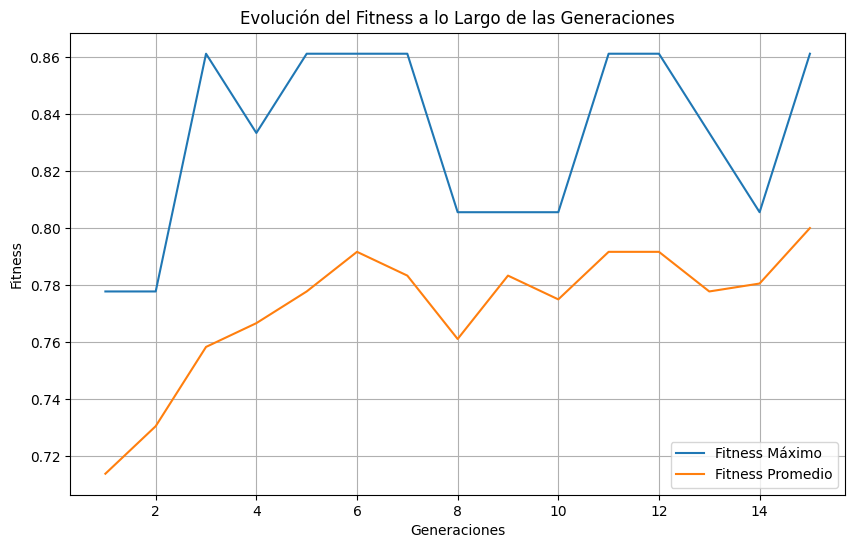

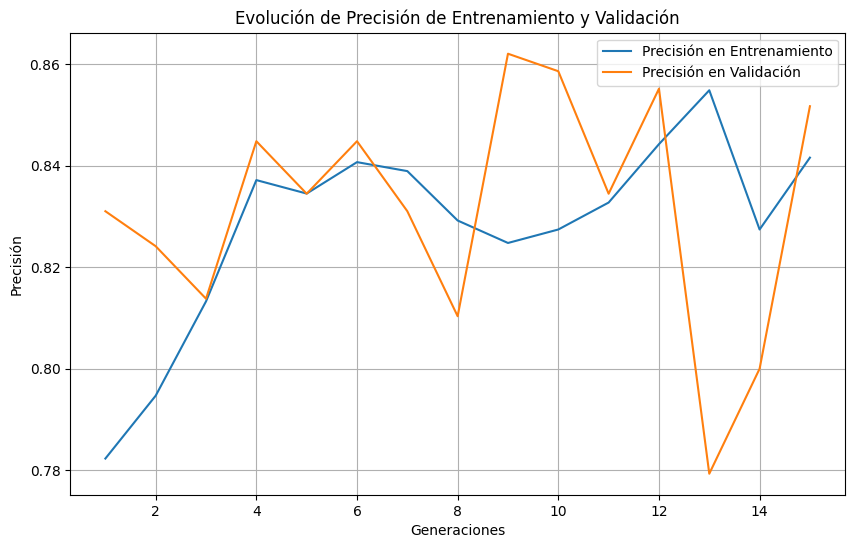

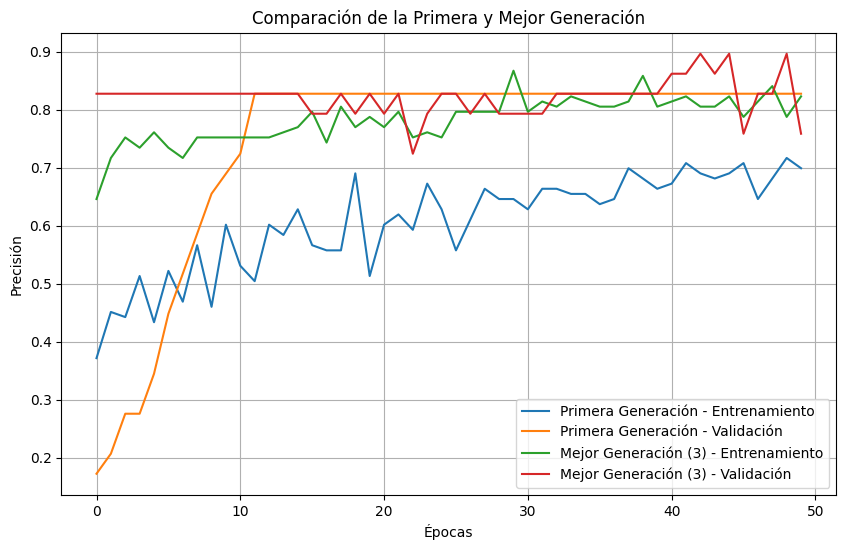

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import random
import matplotlib.pyplot as plt

# Datos
csv_features_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_features_flattened.csv"
data = pd.read_csv(csv_features_path)
features = data.iloc[:, :-2].values  # Todas las columnas excepto 'label' y 'filename'
labels = data["label"].values  # Etiquetas (1 o 0)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Algoritmo genético
population_size = 10
generations = 15
mutation_rate = 0.2

# Definir el espacio de búsqueda
param_space = {
    "layer_1_neurons": (128, 4048),
    "layer_2_neurons": (64, 1024),
    "layer_3_neurons": (32, 512),
    "dropout_rate": (0.1, 0.5),
    "learning_rate": (0.0001, 0.01)
}

# Variables para almacenar métricas
training_accuracies = []
testing_accuracies = []
generation_numbers = []
fitness_max = []
fitness_avg = []
best_generation_histories = []
first_generation_histories = []

# Función para crear un modelo con parámetros específicos
def create_model(params):
    model = Sequential([
        Dense(params['layer_1_neurons'], activation="relu", input_shape=(2048,)),
        Dropout(params['dropout_rate']),
        Dense(params['layer_2_neurons'], activation="relu"),
        Dropout(params['dropout_rate']),
        Dense(params['layer_3_neurons'], activation="relu"),
        Dropout(params['dropout_rate']),
        Dense(1, activation="sigmoid")
    ])
    optimizer = SGD(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Función para evaluar el rendimiento del modelo
def evaluate_model(params):
    model = create_model(params)
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    score = accuracy_score(y_test, y_pred)
    return score, model, history.history

# Generar población inicial
def generate_population(size):
    population = []
    for _ in range(size):
        individual = {
            "layer_1_neurons": random.randint(*param_space['layer_1_neurons']),
            "layer_2_neurons": random.randint(*param_space['layer_2_neurons']),
            "layer_3_neurons": random.randint(*param_space['layer_3_neurons']),
            "dropout_rate": random.uniform(*param_space['dropout_rate']),
            "learning_rate": random.uniform(*param_space['learning_rate'])
        }
        population.append(individual)
    return population

# Selección de los mejores individuos
def select_population(population, scores, top_k=5):
    sorted_indices = np.argsort(scores)[-top_k:]
    return [population[i] for i in sorted_indices], sorted_indices

# Cruzamiento
def crossover(parent1, parent2):
    child = {}
    for key in parent1.keys():
        child[key] = random.choice([parent1[key], parent2[key]])
    return child

# Mutación
def mutate(individual):
    if random.random() < mutation_rate:
        key = random.choice(list(param_space.keys()))
        if isinstance(param_space[key][0], int):
            individual[key] = random.randint(*param_space[key])
        else:
            individual[key] = random.uniform(*param_space[key])
    return individual

# Algoritmo genético
population = generate_population(population_size)
best_model = None
best_score = 0
best_generation_index = 0

for generation in range(generations):
    print(f"Generación {generation + 1}")
    scores_and_models = [evaluate_model(individual) for individual in population]
    scores = [score for score, _, _ in scores_and_models]
    histories = [history for _, _, history in scores_and_models]

    # Registrar métricas de fitness
    fitness_max.append(max(scores))
    fitness_avg.append(np.mean(scores))

    # Registrar precisión de entrenamiento y prueba
    avg_train_accuracy = np.mean([history['accuracy'][-1] for history in histories])
    avg_val_accuracy = np.mean([history['val_accuracy'][-1] for history in histories])
    training_accuracies.append(avg_train_accuracy)
    testing_accuracies.append(avg_val_accuracy)
    generation_numbers.append(generation + 1)

    # Guardar historia de la primera generación
    if generation == 0:
        first_generation_histories = histories

    # Actualizar el mejor modelo
    max_score_idx = np.argmax(scores)
    if scores[max_score_idx] > best_score:
        best_score = scores[max_score_idx]
        best_model = scores_and_models[max_score_idx][1]
        best_generation_histories = histories
        best_generation_index = generation + 1
        # Guardar el modelo
        best_model.save(f"best_model_gen_{generation + 1}.h5")
        print(f"Nuevo mejor modelo guardado con precisión: {best_score:.2f}")

    print(f"Mejor precisión en esta generación: {max(scores):.2f}")
    best_individuals, _ = select_population(population, scores)
    new_population = []
    for _ in range(population_size):
        parent1, parent2 = random.sample(best_individuals, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
    population = new_population

# Guardar el mejor modelo final
print(f"Mejor precisión final: {best_score:.2f}")
best_model.save("best_model_final.h5")

# Graficar evolución del fitness
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, fitness_max, label="Fitness Máximo")
plt.plot(generation_numbers, fitness_avg, label="Fitness Promedio")
plt.xlabel("Generaciones")
plt.ylabel("Fitness")
plt.title("Evolución del Fitness a lo Largo de las Generaciones")
plt.legend()
plt.grid(True)
plt.show()

# Graficar evolución de training y test
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, training_accuracies, label="Precisión en Entrenamiento")
plt.plot(generation_numbers, testing_accuracies, label="Precisión en Validación")
plt.xlabel("Generaciones")
plt.ylabel("Precisión")
plt.title("Evolución de Precisión de Entrenamiento y Validación")
plt.legend()
plt.grid(True)
plt.show()

# Graficar comparación de la mejor generación y la primera
first_gen_train = [history['accuracy'] for history in first_generation_histories]
first_gen_val = [history['val_accuracy'] for history in first_generation_histories]
best_gen_train = [history['accuracy'] for history in best_generation_histories]
best_gen_val = [history['val_accuracy'] for history in best_generation_histories]

plt.figure(figsize=(10, 6))
plt.plot(first_gen_train[0], label="Primera Generación - Entrenamiento")
plt.plot(first_gen_val[0], label="Primera Generación - Validación")
plt.plot(best_gen_train[0], label=f"Mejor Generación ({best_generation_index}) - Entrenamiento")
plt.plot(best_gen_val[0], label=f"Mejor Generación ({best_generation_index}) - Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Comparación de la Primera y Mejor Generación")
plt.legend()
plt.grid(True)
plt.show()



In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos
csv_features_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_features_flattened.csv"
data = pd.read_csv(csv_features_path)
features = data.iloc[:, :-2].values  # Todas las columnas excepto 'label' y 'filename'
labels = data["label"].values  # La columna de etiquetas (1 o 0)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Cargar el mejor modelo
model_path = "best_model_final.h5"
model = load_model(model_path)

# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo cargado: {accuracy:.2f}")

# Inspeccionar los parámetros de la red
for i, layer in enumerate(model.layers):
    if 'dense' in layer.name.lower():
        weights, biases = layer.get_weights()
        print(f"Capa {i + 1} - Tipo: Dense")
        print(f"  Número de neuronas: {weights.shape[1]}")
        print(f"  Dimensiones de entrada: {weights.shape[0]}")
    elif 'dropout' in layer.name.lower():
        print(f"Capa {i + 1} - Tipo: Dropout")
        print(f"  Tasa de Dropout: {layer.rate}")

# Recuperar los hiperparámetros del optimizador
optimizer_config = model.optimizer.get_config()
learning_rate = optimizer_config.get('learning_rate', 'No especificado')
print(f"Tasa de aprendizaje utilizada: {learning_rate}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 
Precisión del modelo cargado: 0.86
Capa 1 - Tipo: Dense
  Número de neuronas: 3385
  Dimensiones de entrada: 2048
Capa 2 - Tipo: Dropout
  Tasa de Dropout: 0.2636257282175581
Capa 3 - Tipo: Dense
  Número de neuronas: 487
  Dimensiones de entrada: 3385
Capa 4 - Tipo: Dropout
  Tasa de Dropout: 0.2636257282175581
Capa 5 - Tipo: Dense
  Número de neuronas: 238
  Dimensiones de entrada: 487
Capa 6 - Tipo: Dropout
  Tasa de Dropout: 0.2636257282175581
Capa 7 - Tipo: Dense
  Número de neuronas: 1
  Dimensiones de entrada: 238
Tasa de aprendizaje utilizada: 0.007121373433619738


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Cargar los datos
csv_features_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_features_flattened.csv"
data = pd.read_csv(csv_features_path)
features = data.iloc[:, :-2].values  # Todas las columnas excepto 'label' y 'filename'
labels = data["label"].values  # Etiquetas (1 o 0)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Cargar el modelo
model = load_model("best_model_final.h5")

# Evaluar el modelo en datos de entrenamiento
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Pérdida en entrenamiento: {train_loss:.4f}")
print(f"Precisión en entrenamiento: {train_accuracy:.4f}")

# Evaluar el modelo en datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {test_loss:.4f}")
print(f"Precisión en prueba: {test_accuracy:.4f}")

# Calcular la métrica de overfitting
overfitting_metric = abs(train_accuracy - test_accuracy)
print(f"Métrica de overfitting (diferencia de precisión): {overfitting_metric:.4f}")

# Interpretación del overfitting basado en diferencia
if overfitting_metric < 0.05:
    print("El modelo generaliza bien (bajo overfitting).")
elif overfitting_metric < 0.1:
    print("Moderado overfitting: el modelo necesita mejoras en generalización.")
else:
    print("Alto overfitting: el modelo está sobreajustado a los datos de entrenamiento.")


Pérdida en entrenamiento: 0.4314
Precisión en entrenamiento: 0.7887
Pérdida en prueba: 0.4859
Precisión en prueba: 0.7222
Métrica de overfitting (diferencia de precisión): 0.0665
Moderado overfitting: el modelo necesita mejoras en generalización.


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model("best_model_final.h5")

# Dividir el dataset en entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Evaluar en datos de entrenamiento
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Precisión en entrenamiento: {train_accuracy:.2f}")

# Evaluar en datos de prueba
y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Precisión en prueba: {test_accuracy:.2f}")

# Diferencia entre ambas precisiones
print(f"Diferencia de precisión (entrenamiento - prueba): {train_accuracy - test_accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Precisión en entrenamiento: 0.79
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Precisión en prueba: 0.72
Diferencia de precisión (entrenamiento - prueba): 0.07


In [8]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Ruta para guardar el modelo
model_save_path = "/content/drive/MyDrive/curriculum_viate_dataset/trained_model.h5"

# Guardar el modelo entrenado
model.save(model_save_path)
print(f"Modelo guardado en: {model_save_path}")

# Para cargar el modelo guardado más adelante
loaded_model = load_model(model_save_path)

# Verificar el modelo cargado evaluándolo con los datos de prueba
y_pred_loaded = (loaded_model.predict(X_test) > 0.5).astype("int32")
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Precisión del modelo cargado: {accuracy_loaded * 100:.2f}%")


NameError: name 'model' is not defined

In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model

# Ruta del modelo entrenado y datos no etiquetados
model_path = "/content/drive/MyDrive/curriculum_viate_dataset/trained_model.h5"  # Cambia a la ruta de tu modelo
unlabeled_csv_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_images.csv"  # Dataset sin etiquetas
output_csv_path = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_labels_with_predictions.csv"

# Cargar el modelo entrenado
model = load_model(model_path)

# Cargar el extractor de características ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Función para cargar y preprocesar imágenes en batch
def preprocess_and_extract_features_batch(image_paths, target_size=(299, 299)):
    """
    Preprocesa un batch de imágenes y extrae sus características.
    """
    batch_images = []
    for image_path in image_paths:
        try:
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)
            batch_images.append(img_array)
        except Exception as e:
            print(f"Error al cargar la imagen {image_path}: {e}")
            batch_images.append(np.zeros((*target_size, 3)))  # Imagen vacía si hay error
    batch_images = np.array(batch_images)
    batch_images = preprocess_input(batch_images)
    features = feature_extractor.predict(batch_images)  # Extraer características en batch
    return features

# Cargar datos sin etiquetas
data = pd.read_csv(unlabeled_csv_path)

# Configurar batch size
batch_size = 32
total_batches = len(data) // batch_size + (1 if len(data) % batch_size != 0 else 0)

# Inicializar lista para almacenar etiquetas predichas
predicted_labels = []

# Procesar y predecir por batches
for batch_num in range(total_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(data))
    batch_data = data.iloc[start_idx:end_idx]

    image_paths = batch_data["filename"].tolist()

    print(f"Procesando batch {batch_num + 1}/{total_batches}...")

    # Preprocesar imágenes y extraer características
    try:
        batch_features = preprocess_and_extract_features_batch(image_paths)
        # Predecir etiquetas en batch
        predictions = model.predict(batch_features)
        batch_labels = [1 if pred[0] > 0.5 else 0 for pred in predictions]  # Etiquetas binarias
        predicted_labels.extend(batch_labels)
    except Exception as e:
        print(f"Error al procesar el batch {batch_num + 1}: {e}")
        predicted_labels.extend([None] * len(image_paths))  # Etiqueta como None si hay un error

# Agregar etiquetas predichas al DataFrame
data["label"] = predicted_labels

# Guardar el nuevo archivo CSV
data.to_csv(output_csv_path, index=False)

print(f"Etiquetas generadas y guardadas en {output_csv_path}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Procesando batch 1/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Procesando batch 2/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Procesando batch 3/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Procesando batch 4/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Procesando batch 5/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Procesando batch 6/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Procesando batch 7/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Procesando batch 8/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Procesando batch 9/919...
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Procesando batch 10/919...
1/1 ━

In [ ]:
import numpy as np
import os
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import pandas as pd

# Cargar el modelo preentrenado EfficientNetB0
base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Función para cargar un batch de imágenes
def load_images_in_batch(image_paths, target_size=(224, 224)):
    """
    Carga un batch de imágenes y las preprocesa para el modelo EfficientNetB0.
    """
    batch_images = []
    for img_path in image_paths:
        try:
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            batch_images.append(img_array)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
            batch_images.append(np.zeros((*target_size, 3)))  # Imagen vacía si hay error
    batch_images = np.array(batch_images)
    return preprocess_input(batch_images)

# Directorios y CSV
csv_path = "/content/drive/MyDrive/curriculum_viate_dataset/labels.csv"
output_csv_features = "/content/drive/MyDrive/curriculum_viate_dataset/dataset_features.csv"

# Cargar el archivo CSV con las etiquetas
data = pd.read_csv(csv_path)

# Inicializar listas para características, etiquetas y nombres de archivos
features = []
labels = []
filenames = []

# Configurar batch size
batch_size = 32
total_batches = len(data) // batch_size + (1 if len(data) % batch_size != 0 else 0)

# Procesar las imágenes en batches
for batch_num in range(total_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(data))
    batch_data = data.iloc[start_idx:end_idx]

    image_paths = batch_data["filename"].tolist()
    batch_labels = batch_data["label"].tolist()

    print(f"Procesando batch {batch_num + 1}/{total_batches}...")

    # Cargar y preprocesar imágenes en batch
    batch_images = load_images_in_batch(image_paths)

    # Extraer características para el batch
    batch_features = feature_extractor.predict(batch_images)

    # Guardar las características, etiquetas y nombres de archivos
    features.extend(batch_features)
    labels.extend(batch_labels)
    filenames.extend(image_paths)

# Crear un DataFrame para guardar las características y etiquetas
features_df = pd.DataFrame(features)
features_df["label"] = labels
features_df["filename"] = filenames

# Guardar como archivo CSV
features_df.to_csv(output_csv_features, index=False)

print(f"Características extraídas y guardadas en {output_csv_features}")


In [ ]:
import os
import pandas as pd

# Directorios de las carpetas
similar_folder = "/content/drive/MyDrive/curriculum_viate_dataset/curriculum_recomendados"  # Cambia esto a la carpeta de currículums similares
not_similar_folder = "/content/drive/MyDrive/curriculum_viate_dataset/CV_norecomendados"  # Cambia esto a la carpeta de currículums no similares

# Crear listas para almacenar nombres de archivos y etiquetas
filenames = []
labels = []

# Etiquetar archivos de la carpeta "similares"
for file in os.listdir(similar_folder):
    if file.endswith((".jpg", ".jpeg", ".png")):  # Filtrar imágenes
        filenames.append(os.path.join(similar_folder, file))
        labels.append(1)  # Etiqueta: 1 para "similar"

# Etiquetar archivos de la carpeta "no similares"
for file in os.listdir(not_similar_folder):
    if file.endswith((".jpg", ".jpeg", ".png")):  # Filtrar imágenes
        filenames.append(os.path.join(not_similar_folder, file))
        labels.append(0)  # Etiqueta: 0 para "no similar"

# Crear un DataFrame con los nombres de los archivos y etiquetas
data = {"filename": filenames, "label": labels}
df = pd.DataFrame(data)

# Guardar el DataFrame como archivo CSV
output_csv = "/path/to/labels.csv"  # Ruta donde quieres guardar el archivo CSV
df.to_csv(output_csv, index=False)

print(f"Archivo CSV generado con {len(filenames)} registros. Guardado en: {output_csv}")
